&nbsp;

# Presentaciones Interactivas con Jupyter Notebook + RISE <br> *Todo lo que necesitas saber en 30 minutos*

## Sebastián Flores
### 27 Agosto, PyCon Latam 2021

<div>
    <div style="display: inline-block;  width: 50%;">
        <ul>
            <li> Sebastián Flores </li>
            <li> Matemática, Computación, Educación </li>
            <li> Python, javascript, html </li>
            <li> sebastiandres.xyz </li>
        </ul>
    </div>
    <div style="display: inline-block; vertical-align: text-bottom; width: 30%;">
        <img src="images/pycon_2020.jpeg" alt="PyCon 2020">
    </div>
</div>

1. ¿Qué es RISE?
2. ¿Porqué usar RISE?
3. ¿Qué incluir?
4. ¿Cómo usar RISE?
5. ¿Cómo comenzar?
6. ¿Cómo personalizar?
7. ¿Cómo compartir?
8. Consejos finales

# 1. ¿Qué es RISE?


##### 1. ¿Qué es RISE?

En lugar de mostrar una larga página web con las celdas, las celdas **se agrupan** en diapositivas. 

Las distintas celdas pueden ser editadas y ejecutadas **DURANTE LA PRESENTACIÓN**.

Se usa la librería de javascript [reveal.js](https://revealjs.com/). 


##### 1. ¿Qué es RISE?

**RISE = Reveal.js IPython Slide Extension**

Es una extensión a los jupyter notebooks que permite transformarlos en una presentación interactiva. 

Con **herramientas** de *markdown*, <font style="color:green">html</font> y latex: $ e^{i \pi} + 1 = 0 $


y python:

In [33]:
print("Hola \U0001F30E")

Hola 🌎


# 2. ¿Porqué usar RISE?


#### Ventajas

* Simplificar la **generación** de material. 

* Simplificar la **distribución** del material.

#### Desventajas

* RISE funciona sólo con Jupyter Notebook. No funciona con Jupyter Lab ni con Google Colaboratory.
* Es completamente interactivo, con todos los riesgos y beneficios que eso representa.

Primero, porque simplifica enormemente la **generación** de material. El jupyter notebook es simultáneamente la presentación, el código, el apunte y texto oficial, y no necesitas actualizar en múltiples lugares. Detesto sacar una captura de pantalla a un trozo de código, porque tendré que estar eternamente actualizando esa imagen. También odio escribir código en cuadros de texto que quedan sin formato y donde siempre se pasa algún error, que no se detecta porque el código no se puede ejecutar.

Segundo, porque simplifica la **distribución** del material. La presentación contiene todo lo que la audiencia necesita: explicaciones, imágenes, videos y/o código. Proporcionando un archivo `requirements.txt` es fácil recrear un ambiente con las librerías necesarias para ejecutar el código. Almacenando el jupyter notebook en github, es además fácil compartir el archivo ipynb del jupyter notebook, un html o pdf pre-generado fácil de visualizar o incluso un enlace a un repositorio binder donde la presentación se puede volver a visualizar de manera interactiva. Entregar múltiples opciones le entrega facilidades a la audiencia y permite generar más impacto.

# 3. ¿Qué contenido incluir?

##### 3. ¿Qué contenido incluir?

Puedes mezclar contenido usando las celdas de markdown y código, según necesites: 
* **Markdown**: texto, latex, imágenes, tablas, etc.
* **Código**: código, gráficos simples o interactivos, videos, sonido, iframes, javascript, entre otros.


Como regla general, si se muestra correctamente en el notebook, se verá bien en la diapositiva. 

¡Sé creativo! La gracia es precisamente que todo puede ser interactivo.

##### 3.1 GIFs Animados

Incluir gifs animados es igual de fácil que incluir imágenes, y suele ayudar a tener apoyos visuales atractivos.

##### 3.2 Gráficos

Para mostrar gráficos resulta práctico que no se genere una ventana adicional, sino que se agreguen a la celda de resultados. Esta es una práctica común en jupyter notebook/lab, pero es más importante aún al pensar en las diapositivas.

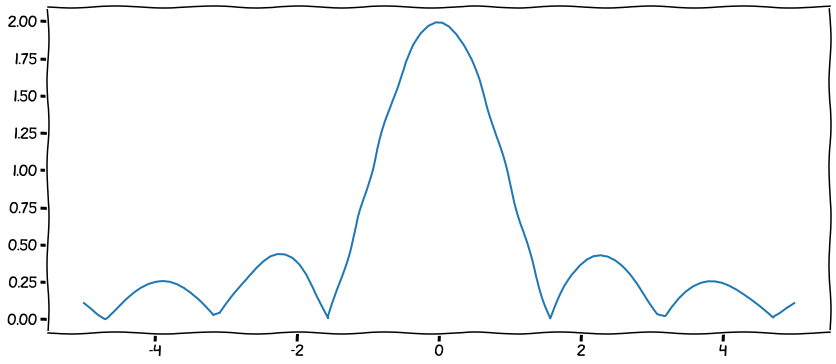

In [34]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

with plt.xkcd():
    fig = plt.figure(figsize=(14,6))
    x = np.linspace(-5,5,num=100)
    y = np.abs(np.abs(np.sin(2*x)/x))
    plt.plot(x,y)

##### 3.3 IPython.display

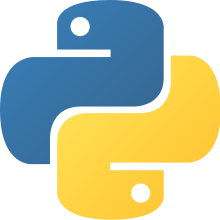

In [35]:
from IPython.display import Audio, Image, display
a = Audio("http://www.w3schools.com/html/horse.ogg")
i = Image(filename="images/Python.png", width=100)
display(a,i)

In [36]:
from IPython.display import Javascript
Javascript('alert("¡¡Tenemos javascript!!");')

<IPython.core.display.Javascript object>

##### 3.4 Widgets

In [40]:
%matplotlib inline
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

@widgets.interact(grado=(0, 9), N_puntos=(5,35))
def mi_plot(grado=3, N_puntos=5):    
    x = np.linspace(-10, 10, N_puntos)
    y = x**grado
    plt.figure(figsize=(12,8))
    plt.plot(x, y, 'ro-')
    plt.grid(True)
    plt.show()

interactive(children=(IntSlider(value=3, description='grado', max=9), IntSlider(value=5, description='N_puntos…

##### 3.5 Tu librería

Si tienes una librería (en local, en línea o en pypi) puedes usar la presentación para mostrar como se usa... ¡en vivo!

Por ejemplo, un proyecto llamado pypsdier para la simulación de ecuaciones de reacción-difusión de catalizadores inmobilizados

In [41]:
!pip install git+https://github.com/sebastiandres/pypsdier.git --upgrade

  Cloning https://github.com/sebastiandres/pypsdier.git to /private/var/folders/68/v1ds0ld152q_wk4sbcns3ckw0000gn/T/pip-req-build-ztxz827u
  Running command git clone -q https://github.com/sebastiandres/pypsdier.git /private/var/folders/68/v1ds0ld152q_wk4sbcns3ckw0000gn/T/pip-req-build-ztxz827u
You should consider upgrading via the '/miniconda3/bin/python -m pip install --upgrade pip' command.


In [42]:
import pypsdier
SIM = pypsdier.SimulationInterface()
SIM.status()

System configuration:
    environment: python
    python version: 3.7.4
    GenericSimulationLibrary version: 1.1.1
    numpy version: 1.19.5
    scipy version: 1.6.3
    xlwt version: 1.3.0
    matplotlib version: 3.3.3
    dill version: 0.3.2
Inputs:
    No inputs
Plot Options:
    No plot_options
Simulations:
    ODE: no
    PDE: no


In [43]:
SIM.load("data/pypsdier_example.rde")
SIM.status()

Loaded a simulation from /Users/sebastiandres/Projects/charlas-y-eventos/talk_2021_08_pylatam/data/pypsdier_example.rde
System configuration:
    environment: google_colab
    python version: 3.6.9
    GenericSimulationLibrary version: 1.1.0
    numpy version: 1.18.5
    scipy version: 1.4.1
    xlwt version: 1.3.0
    matplotlib version: 3.2.2
    dill version: 0.3.2
Inputs:
    SimulationTime: 120.0
    SavingTimeStep: 1.0
    CatalystVolume: 0.5
    BulkVolume: 100.0
    Names: ('Substrat',)
    InitialConcentrations: (1.3,)
    EffectiveDiffusionCoefficients: (5.3e-10,)
    CatalystParticleRadius: [4e-05, 6e-05, 8e-05]
    CatalystParticleRadiusFrequency: [0.3, 0.5, 0.2]
    ReactionFunction: <function MichaelisMenten at 0x10d5184d0>
    ReactionParameters: (41, 0.13)
    CatalystEnzymeConcentration: 0.35
Plot Options:
    title: Simulación de Michaelis Menten para la PyconAr
    label_x: Tiempo de reacción [s]
    label_y: Concentración [mM]
    ode_kwargs: {'label': 'ode', 'color

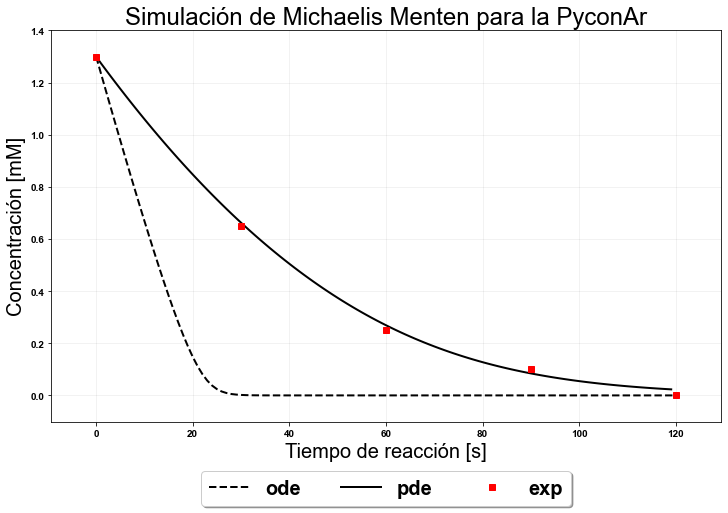

In [44]:
SIM.plot()

##### 3.6 Clases
Al empaquetar tu código con clases, asegúrate de incluir una función `_repr_html_` para poder interactuar nativamente con jupyter notebook (y RISE):

In [45]:
class Alerta(object):
    
    def __init__(self, text):
        self.text = "\U000026A0 - " + text.upper()

    def _repr_html_(self):
        return "<h1 style='color:white;background:red;padding:30px'>" + self.text + "</h1>"

In [46]:
Alerta("Comenzar a hablar de RISE")

# 4. ¿Cómo usar RISE?

##### 4.1 ¿Cómo instalar?

**Paso 1**: 

La instalación de la extensión RISE es extremadamente fácil:

```bash
pip install rise
```

o

```bash
conda install -c conda-forge rise
```

Eso hará que se agregue el botón de iniciar presentación (destacado en rojo).

![](images/install2.png)

**Paso 2**: 

En el menú de jupyter notebook, es necesario seleccionar `View/Cell Toolbar/Slideshow` para que permita configurar el tipo de celda para diapositiva. 
![](images/install3.png)

![](images/install4.png)

##### 4.2 ¿Cómo se configuran las diapositivas?

Existen varios tipos de celda con distintas funcionalidades:
* `-`: valor por defecto. La celda se muestra con la slide anterior.
* `Slide`: inicia una nueva diapositiva (dirección horizontal).
* `Sub-slide`: iniciar una nueva sub-diapositiva (dirección vertical).
* `Fragment`: se concatena a la celda anterior, pero no se muestra inmediatamente. 
* `Skip`: no se muestra la celda en las diapositivas.
* `Notes`: No se muestra en las diapositivas, sólo se muestra en las notas para el presentador.


![](images/install4.png)

##### 4.3 ¿Cómo moverse por las slides?

Al hacer click en el botón "Iniciar presentación", la presentación se iniciará en la celda que esté activa.

* Se accede a la próxima diapositiva o fragmento con `Espacio` (o la flecha derecha).
* Se retrocede a la diapositiva o fragmento anterior con `Shift Espacio` (o la flecha izquierda).
* Se avanza a la próxima sub-diapositiva con `Page Up`.
* Se retrocede la sub-diapositiva anterior con `Page Down`.

¡O simplemente usar el mouse!

Existen 2 direcciones: slides (izquierda a derecha) y subslides (arriba a abajo).

![](images/revealjs-vertical-slides.gif "Gif oficial de reveal.js https://revealjs.com/vertical-slides/")

**Personalmente** no uso subslides porque no logro recordar un orden que no sea lineal, y termino saltándome las subslides sin querer.

##### 4.4 ¿Qué opciones hay?

Existen múltiples funcionalides accesibles con el teclado durante la presentación, pero las principales a recordar son:
* `,`: ocultar los botones.
* `w`: Mostrar orden de diapositivas.
* `?`: ver todos los atajos de teclado.

##### 4.5 Tamaño de fuente e imágenes

Un problema común es que al conectar el computador a otra pantalla o datashow, no se alcanza a ver en la diapositiva todo el código, texto o imagen. 

`Ctrl +` y `Ctrl -` permiten regular el tamaño (`⌘+`y `⌘-` en Mac), de la misma manera que regulas el tamaño de una página web.

![](2021-08-01-tutorial-rise-parte-1/tamano.gif)

##### 4.6 ¿Dónde están las notas del presentador?

Puedes abrir las notas del presentador presionando `t`.

Para poder usar las notas del presentador necesitas tener al menos 2 pantallas.

![](images/notas_presentador.gif)

# 5. ¿Cómo comenzar?

##### 5. ¿Cómo comenzar?

Existen 3 formas de presentar con jupyter notebook + RISE:

* Crea un nuevo notebook.
* Recicla un notebook existente. 
* Recicla una presentación de PowerPoint.

##### 5.1 y 5.2 Creando o reciclando un notebook

Para cada celda (markdown o código) que tengas en el jupyter notebook, indica que **tipo de diapositiva** deberá usar.

Usar principalmente:
* `Slide`: inicia una nueva diapositiva (dirección horizontal).
* `-`: Se concantena a la interior inmediatamente.
* `Fragment`: se concatena a la celda anterior, pero con una animación (no inmediata).

Evitar:
* `Skip`: no se muestra la celda en las diapositivas.
* `Notes`: No se muestra en las diapositivas, sólo se muestra en las notas para el presentador.
* `Sub-slide`: iniciar una nueva sub-diapositiva (dirección vertical).

##### 5.3 Conviertiendo una presentaciones de PowerPoint

Si ya tienes una presentación pptx, puedes convertirla con una herramienta en línea.
No es perfecta, pero te ahorrará un buen tiempo de copiar y pegar texto.

[https://share.streamlit.io/sebastiandres/streamlit_ppt2rise/main](https://share.streamlit.io/sebastiandres/streamlit_ppt2rise/main)

El funcionamiento es el siguiente. Supongamos que tienes una presentación que necesitas convertir: `simple.pptx`

![Simple.pptx](images/original_pptx.gif)
simple.pptx

Primero que nada, en el sitio debes cargar la presentación, esperar que se convierta y descargar el notebook + RISE equivalente:

![](images/ppt2rise.gif)



Después de descargar y descomprimir, al lanzar el notebook en jupyter la presentación debería comenzar de inmediato: 

![](images/slides_ipynb.gif)

# 6. ¿Cómo personalizar?

##### 6.1 Metadata del notebook
Todas las configuraciones de RISE se realizan **editando la metadata del notebook**. 

Para ello, tienes que ir a `Edit/Edit notebook metadata` y agregar la(s) opcion(es) deseadas.

![Metadata](images/metadata.gif)

##### 6.1 Metadata del notebook

La metadata es un diccionario json con las distintas opciones de todo el notebook. Por defecto, no trae ninguna opción cargada de RISE. Por eso, tenemos que **agregar** las opciones que se quieren configurar:

```json
 "rise": {
             "opcion_1": valor_opcion_1,
                      ...
             "opcion_n": valor_opcion_n,
         }
````


**Observación importante**: 

Cada vez que editas la metadata, es necesario cerrar (apagar) el notebook y volver a abrirlo para que se recarguen las opciones. 


##### 6.2 Eligiendo un tema

El tema de la presentación controla el aspecto general de la presentación. 


En la metadata del notebook se agrega la opción de "theme" con el nombre del tema deseado:

```json
 "rise": {"theme": "sky"}
````

Existen 11 opciones, que se heredan de la librería [revealjs](https://revealjs.com/themes/):

* **black**: Fondo negro, letras blancas, links azules.
* **white**: Fondo blanco, letras negras, links celestes.
* **league**: Fondo gris, letras blancas, links celestes.
* **sky**: Fondo celeste, letras oscuras, links azules. 
* **beige**: Fondo beige, letras oscuras, links cafés.
* **simple**: Fondo blanco, letras negras, links azules. 
* **serif**: Fondo café, letras grises, links cafés. 
* **night**: Fondo negro, letras blancas, links naranjos. 
* **blood**: Fondo oscuro, letras blancas, links rojos.
* **moon**: Fondo azul oscuro, letras grises, links azules.
* **solarized**: Fondo blanco crema, letras verde oscuro, links azules.

![Themes](images/themes.png)

La imagen fue compilada por el siguiente [blog](https://dev.to/emmabostian/how-to-build-a-captivating-presentation-using-html-css--javascript-nno).

##### 6.3 Eligiendo una transición
El tipo de transición entre slides se define de manera similar. En la metadata del notebook se agrega la opción de "transition" con el nombre de la transición deseada:

```json
 "rise": {"transition": "zoom"}
```

Las opciones, heredadas de las [transiciones](https://revealjs.com/transitions/) existentes en la librería revealjs, son:

* **none**: Sin animación.
* **fade**:	Desaparecer
* **slide**: Deslizar lateralmente.
* **convex**: Animar con ángulo convexo.
* **concave**: Animar con ángulo convexo.
* **zoom**: Animar para que la diapositiva siguiente crezca desde el centro de la pantalla.

Los tipos de transiciones se muestran en esta animación:
![Transitions](images/transitions.gif)

##### 6.4 Definiendo una imagen de fondos

Simplemente, usar:

```json
"rise": {
     "backimage": "mybackimage.png",
 }
}
```

Esta opción es útil si quieres un fondo personalizado, como a veces se exige en algunos congresos. Como es habitual al manejar imágenes, conviene usar archivos png con fondo transparente para que se integre bien con el theme elegido.

![](2021-08-02-tutorial-rise-parte-2/background.gif)


##### 6.5 Definiendo header y footer:
Simplemente, usar:

```json
"rise": {
     "header": "<h1>Hola</h1>",
     "footer": "<h3>Mundo</h3>"
 }
}
```

Puedes usar `<br>` y `&nbsp;` para introducir saltos de línea y espacios en blanco, respectivamente.

![](2021-08-02-tutorial-rise-parte-2/header_footer.gif)



##### 6.6 Lanzar RISE de manera automática

En la metadata del notebook se agrega la opción de "autolaunch" con valor `true` (todo en minúsculas, ¡es verdadero de javascript, no de Python!):

```json
 "rise": {"autolaunch": true}
````

Al publicar tu jupyter notebook con mybinder.org, se mostrará en modo presentación automáticamente.

![Metadata](images/autolaunch.gif)

##### 6.7 Pizarra

Es posible activar una pizarra (chalkboard) para realizar anotaciones durante la presentación.

Para eso, en Edit/Edit Notebook Metadata, es necesario agregar el siguiente texto a la metadata del jupyter notebook:

```json
{
 ...
 "rise": {"enable_chalkboard": true}
}
```

Durante la presentación se puede utilizar la pizarra haciendo click en los íconos, que permiten dibujar en una pizarra o sobre las diapositivas.

Es posible cambiar de color de lapiz presionando `s` y `q`. Se puede borrar la pizarra con `-`.

Las anotaciones se preservan incluso al cerrar el modo presentación. Sin embargo, no se guardan al cerrar el notebook.

## Importante consejo final

Tantas opciones pueden ser sobrecogedoras y difíciles de recordar. Como no se puede tener comentarios en un json, resulta práctico tener guardadas todas las opciones y simplemente agregar un `_` antes de las opciones que no se desean usar.

```json
"rise": {
        "autolaunch": true,
        "enable_chalkboard": true
        "theme": "black",
        "transition": "zoom",
        "_header": "<h1>PRESENTATION NAME // EVENTs</h1>",
        "_footer": "<h3>NAME, DATE</h3>",
        "_backimage": "path/to/mybackimage.png",
        "_theme_options": [ "black", "white", "league", "beige", 
                           "sky", "night", "serif"], 
        "_transition_options": ["none", "fade", "slide", "convex", "concave", "zoom"],
        }
```

![](images/options.gif)

# 7. ¿Cómo compartir?

##### 7. ¿Cómo puedo compartir la presentación?

Muchas opciones: 
* Repositorio en línea
* mybinder
* html
* pdf

##### 7.1 Repositorio

No trabajes en local: usa git + repositorio en línea: github, bitbucket, gitlab u otros.

Incluye: 
* README.md: Explica para qué sirve y cómo usarlo.
* `requirements.txt`: librerías que se requieren en el notebook.
* Todo el código, datos e imágenes.

En github, al activar "Gitub Pages" las páginas html de tu repo pueden consultarse y navegarse.

El archivo de `nombre_repo/ruta_carpetas/nombre_archivo.html` se visualizará en `https://nombre_usuario.github.io/nombre_repo/ruta_carpetas/nombre_archivo.html`.

##### 7.2 mybinder

[Binder](https://mybinder.org) es un servicio que permite lanzar un jupyter notebook en el navegador y en la nube, sin consumir recursos de tu computador y de manera completamente gratuita. 

Resulta práctico para que otras personas pueden ver la presentación de **manera interactiva sin tener que instalar** nada en su computador, ¡incluso desde un smartphone o tablet!

Para usar mybinder, debes tener tu repositorio en github. 

En [Binder](https://mybinder.org) puedes introducir los distintos parámetros:
* Usuario github: **nombre_usuario**
* Nombre repositorio: **nombre_repositorio**
* Nombre de la rama del repositorio: **nombre_rama**
* Ruta al archivo: **ruta_carpetas**
* Nombre del archivo: **nombre_archivo.ipynb**
* En la rama, en el directorio principal, debe existir el archivo `requirements.txt` 

La siguiente página mostrará tu notebook:
```
https://mybinder.org/v2/gh/nombre_usuario/nombre_repositorio/nombre_rama?filepath=ruta_carpetas/nombre_archivo.ipynb
```

Incluirá la extensión RISE si la colocaste en los `requirements.txt`. 


##### 7.3 HTML

En el terminal:

```
jupyter nbconvert --to slides ruta_carpeta/nombre_archivo.ipynb
```

Se generará un archivo html estático de tu presentación, con el nombre `ruta_carpeta/nombre_archivo.slides.html`

##### 7.4 PDF

Se requieren 3 pasos:

1.  Genera las diapositivas en html, usando nbconvert, para que queden "activas":
```
jupyter nbconvert --to slides ruta_carpeta/nombre_archivo.ipynb --post serve
```

  Se abrirá una página web en el navegador, en la dirección `http://127.0.0.1:8000/nombre_archivo.slides.html#/`

2. Edita la ruta, para que sea `http://127.0.0.1:8000/nombre_archivo.slides.html?print-pdf`. 

3. Finalmente, guarda la página web como pdf.

##### 7.5 Todas las anteriores

Incluye un archivo html con todas las opciones, y deja que el usuario elija:

![](images/indexhtml.png)

# 8. Consejos Finales

##### 8.1 ¿Cómo puedo configurar texto e imagen?

Para mostrar columnas mezclando texto e imagenes, simplemente usamos un poco de html:

```html
<div>
    <div style="display: inline-block;  width: 40%;">
Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt 
ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco 
laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in 
voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat 
non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
    </div>
    <div style="display: inline-block; vertical-align: text-bottom; width: 40%;">
        <img src="images/2columns.gif" alt="LoreIpsum">
    </div>
</div>
```

<div>
    <div style="display: inline-block;  width: 40%;">
Lorem ipsum dolor sit amet, consectetur adipiscing elit, sed do eiusmod tempor incididunt ut labore et dolore magna aliqua. Ut enim ad minim veniam, quis nostrud exercitation ullamco laboris nisi ut aliquip ex ea commodo consequat. Duis aute irure dolor in reprehenderit in voluptate velit esse cillum dolore eu fugiat nulla pariatur. Excepteur sint occaecat cupidatat non proident, sunt in culpa qui officia deserunt mollit anim id est laborum.
    </div>
    <div style="display: inline-block; vertical-align: text-bottom; width: 1%;">
    </div>
    <div style="display: inline-block; vertical-align: text-bottom; width: 40%;">
        <img src="images/2columns.gif" alt="LoreIpsum">
    </div>
</div>

Consejo: **keep it simple**. 

Gastar 1 hora en una diapositiva que mostrarás 1 minuto *puede* ser una mala inversión.

##### 7.2 Animaciones complejas

Reveal.js soporta animaciones bastante complejas. 

Creo que es mejor mantener simple, pero siempre puedes buscar en 
https://revealjs.com/

##### Animando framentos
Usando el código
```html
<p class="fragment">Fade in</p>
<p class="fragment fade-out">Fade out</p>
<p class="fragment highlight-red">Highlight red</p>
<p class="fragment fade-in-then-out">Fade in, then out</p>
<p class="fragment fade-up">Slide up while fading in</p>
```
Obtenemos:

<p class="fragment">Fade in</p>
<p class="fragment fade-out">Fade out</p>
<p class="fragment highlight-red">Highlight red</p>
<p class="fragment fade-in-then-out">Fade in, then out</p>
<p class="fragment fade-up">Slide up while fading in</p>

##### Animando framentos
Usando el código
```html
<p class="fragment" data-fragment-index="3">Appears last</p>
<p class="fragment" data-fragment-index="1">Appears first</p>
<p class="fragment" data-fragment-index="2">Appears second</p>
```
Obtenemos:

<p class="fragment" data-fragment-index="3">Appears last</p>
<p class="fragment" data-fragment-index="1">Appears first</p>
<p class="fragment" data-fragment-index="2">Appears second</p>

##### 7.3 Ocultando código

A veces quieres ejecutar una celda pero no mostrar largas filas de código. 

Hay 2 formas de hacerlo:

1. **Simple**: creando función auxiliar y ejecutándola.
2. **Técnica**: usando un poco de magia de jupyter notebook.

**Opción Simple**: 

Podemos definir la función en un archivo, y luego importarla y ejecutarla:

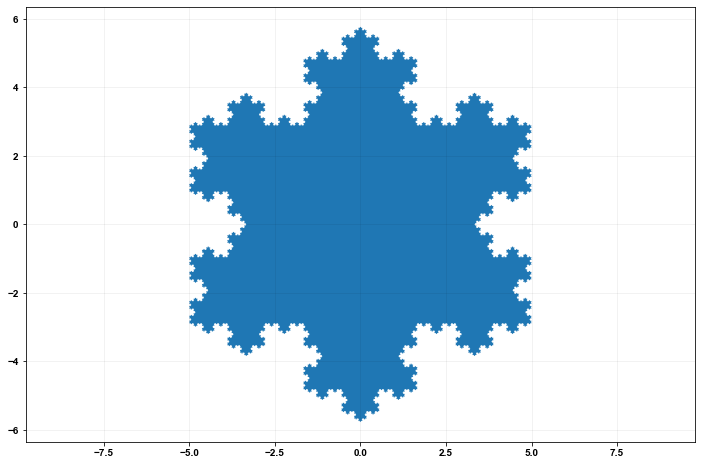

In [48]:
from mi_carpeta import mi_script
mi_script.mi_grafico(order=6, figsize=(12,8))

Si queremos mostrar la función, usamos un poco de bash:

In [49]:
!ls ./mi_carpeta

__init__.py  __pycache__  mi_script.py


In [50]:
!cat mi_carpeta/mi_script.py

# Tomado y adaptado desde:
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/fill.html

import numpy as np
import matplotlib.pyplot as plt

def koch_snowflake(order, scale=10):
    """
    Return two lists x, y of point coordinates of the Koch snowflake.

    Parameters
    ----------
    order : int
        The recursion depth.
    scale : float
        The extent of the snowflake (edge length of the base triangle).
    """
    def _koch_snowflake_complex(order):
        if order == 0:
            # initial triangle
            angles = np.array([0, 120, 240]) + 90
            return scale / np.sqrt(3) * np.exp(np.deg2rad(angles) * 1j)
        else:
            ZR = 0.5 - 0.5j * np.sqrt(3) / 3

            p1 = _koch_snowflake_complex(order - 1)  # start points
            p2 = np.roll(p1, shift=-1)  # end points
            dp = p2 - p1  # connection vectors

            new_points = np.empty(len(p1) * 4, dtype=np.complex128)
            new_points[::4] = p1
            

**Opción Técnica**: 

Usando una función específica para ocultar código, creada con una mezcla de html y javascript.

In [51]:
def toggle_cell_code(button_id):
    """
    Adds a button to toggle (show/hide) the code cell but not the output. 
    
    Parameters
    ----------
    button_id : str
        An identifier for cells that will hide/show when button is pressed.
    """
    
    from IPython.display import display_html
    my_html = '''
    <button type="button" id="%s" onclick="code_toggle('%s')">Código</button>
    <script>
    function code_toggle(my_id) {
        // get the parent element for the cell code and output
        var p = $("#"+my_id);
        if (p.length==0) return;
        while (!p.hasClass("cell")) {
            p = p.parent();
            if (p.prop("tagName") =="body") return;
        }
    // get the cell code and toggle its value
    var cell_code = p.find(".input");
    cell_code.toggle();
    }
    </script>
    ''' %(button_id, button_id)
    return display_html(my_html, raw=True)

Y así se ve en el código:

Código

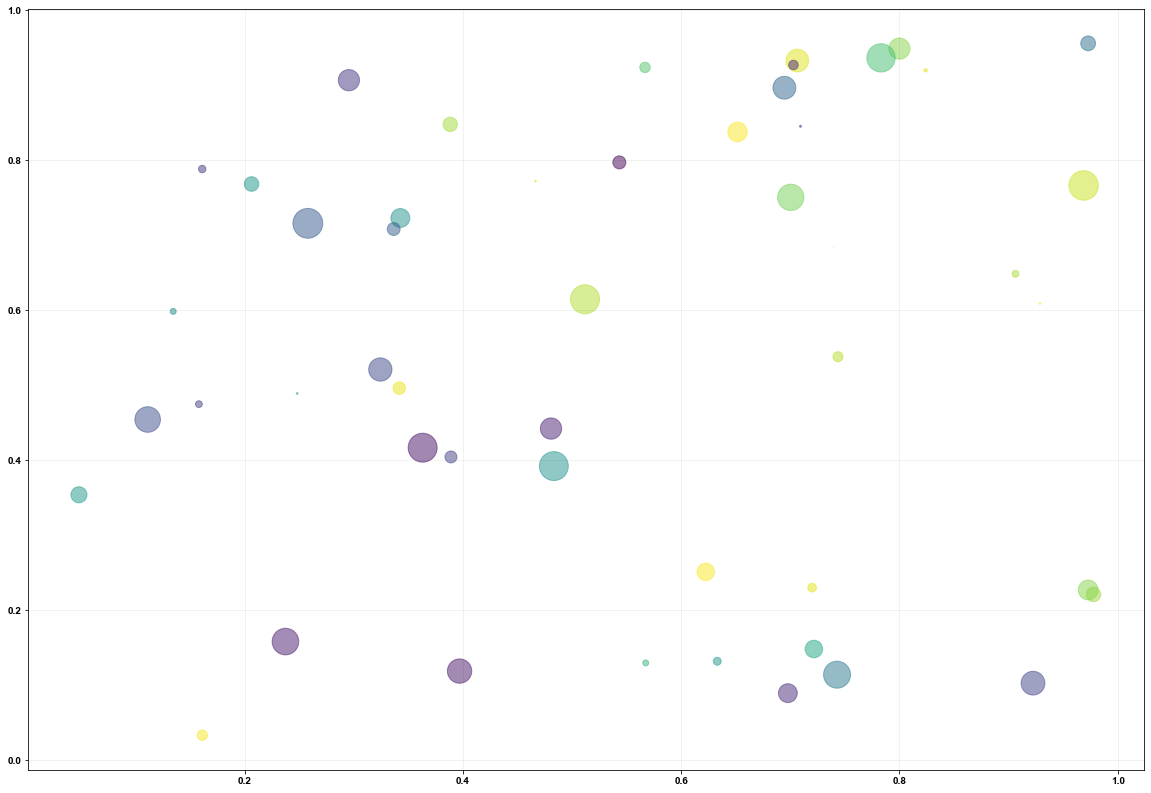

In [52]:
# Botón para esconder el código
toggle_cell_code("un_string_unico_y_reconocible")

# Código para graficar
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = (30 * np.random.rand(N))**2  # 0 to 15 point radii

plt.figure(figsize=(20,14))
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()

##### 7.4 ¿Cómo puedo hacer actividades interactivas?

Para incluir actividades interactivas, como las que se pueden hacer con https://www.mentimeter.com/, https://kahoot.com/ o https://quizizz.com/ (entre otros), es posible tomar varios caminos:

* **Simple**: Colocar un código QR para que la audiencia acceda desde sus smartphones. Luego simplemente te cambias a la página correspondiente para mirar los resultados y compartirlos en pantalla. 

* **Técnica**: Incrustar la página web de la actividad mediante `IFrames`. Desaconsejado, porque cada hay más restricciones a IFrames.

In [53]:
from IPython.display import IFrame
IFrame("https://www.pylatam.org/", width=1200, height=600)

In [54]:
from IPython.display import IFrame
IFrame("https://www.google.com", width=1200, height=600)

##### 7.5 Encuestas

¡No desaproveches la oportunidad de aprender de tu audiencia! Termina con una encuesta.

<div>
    <div style="display: inline-block;  width: 70%;">
        <ul>
            <li> ¿Qué te pareció la charla? Evaluar de 1 a 5. </li>
            <li> ¿Qué le agregarías a la charla? </li>
            <li> ¿Qué le sacarías a la charla? </li>
        </ul>
        <br><br><br><br><br><br>
    </div>
    <div style="display: inline-block; vertical-align: text-bottom; width: 20%;">
        <img src="images/qr.png" alt="LoreIpsum">
        Encuesta de la Charla<br>https://bit.ly/3DnrbN6
    </div>
</div>

# ¡Muchas gracias!


<div>
    <div style="display: inline-block;  width: 70%;">
        Enlaces:
        <ul>
            <li> Documentación oficial de RISE: <b>https://rise.readthedocs.io/</b> </li>
            <li> Mi blog: <b>sebastiandres.xyz</b> </li>
            <li> Charla en PyCon Colombia 2020 y otras voladuras: <b>https://sebastiandres.github.io/</b></li>
        </ul>
        <br><br><br><br><br>
    </div>
    <div style="display: inline-block; vertical-align: text-bottom; width: 20%;">
        <img src="images/qr.png" alt="LoreIpsum">
        Encuesta de la Charla<br>https://bit.ly/3DnrbN6
    </div>
</div>

&nbsp;